In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv
/kaggle/input/d/jolenechen/datacosupplychaindataset/DataCoSupplyChainDataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas_profiling as pp 
import plotly.express as px 
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv', header= 0, encoding= 'unicode_escape')

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
# Getting the summary statistics of the dataset
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [6]:
# Checking the shape of the dataset
df.shape

(180519, 53)

In [7]:
# Checking for missing values
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [8]:
##Create Pandas profile report
profile = pp.ProfileReport(df, title = "EDA")

In [9]:
##Save the report as a file with an html extension
profile.to_file(output_file="reporte.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## ***Null data***

### Null data was found in three columns, Order Zipcode (86% null values, i.e. a total of 155679 records), Product description (100% null values, i.e. a total of 180519 records) and customer zipcode (<0.1% is say a total of 3 records), together these empty cells correspond to 3.5% of the total dataset

## ***Categorical variables***

### There are 28 variables that have been identified as categorical type, however, some variables were classified as categorical when they are numeric, for example Days for shipping and Order item quantity, this happens because all the values ​​are grouped into 4 discrete values, which which causes confusion on the part of pandas profiling. In order to carry out analysis, these variables must be considered as numerical.

## ***Numeric variables***

### There are 24 variables that have been identified as numeric type

## ***EDA Conclusions***

### Do not include in the analysis the columns order zipcode (almost empty), product description (totally empty), customer email (constant without information), Customer password (constant without information), additionally we can replace the null values ​​of the customer zipcode column.

### Finally, there are some columns that can be ignored when doing the analysis since they do not provide relevant information for the object of the study, these columns are: Product Status, Customer Street, Customer Fname, Customer Lname, Latitude, Longitude, Product Image.

# Data Cleaning

In [10]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(180519, 53)
Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Mar

## Removing unnecessary columns

In [11]:
data=df.drop(['Order Zipcode','Product Description', 'Customer Email','Customer Password','Product Status','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Image',],axis=1)
data.shape

(180519, 42)

## Replacing null zipcode values ​​with the most common value 

In [12]:
column_index=data.columns.get_loc("Customer Zipcode")
# Get the index of the column "Customer Zipcode"
data['Customer Zipcode']=data['Customer Zipcode'].fillna(data.mode().iloc[column_index])
#Filling NaN columns with most common value

# Descriptive analysis and visualisation
### Correlation Matrix

<AxesSubplot:>

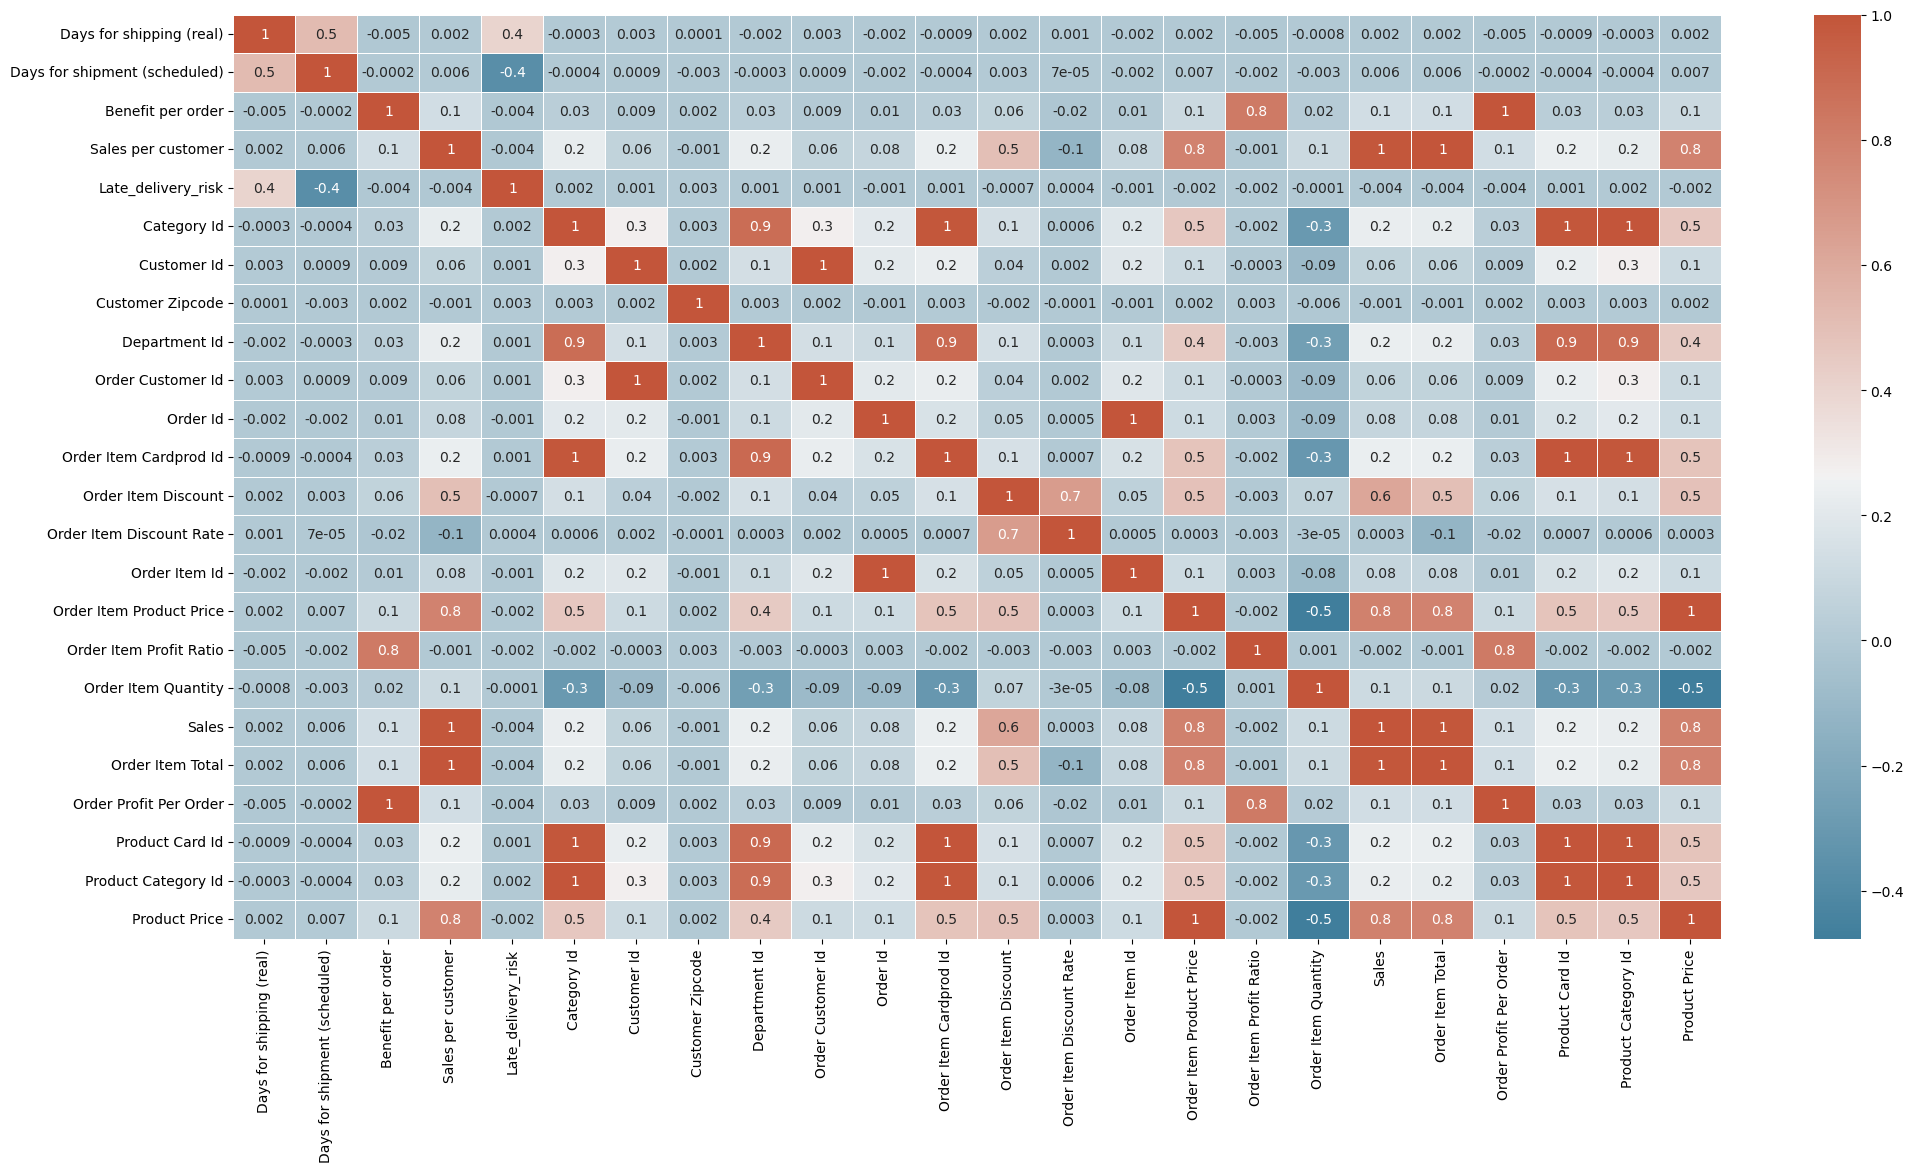

In [13]:
fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= sns.diverging_palette(230, 20, as_cmap=True)) # Heatmap for correlation matrix


### Relative frequency tables  for categorical variables.

In [14]:
count=data['Delivery Status'].value_counts()  #change categoric variable
print(count / len(data))

Late delivery        0.548291
Advance shipping     0.230402
Shipping on time     0.178352
Shipping canceled    0.042954
Name: Delivery Status, dtype: float64


## Category delivered with maximum delay

In [15]:
#Filtering columns with late delivery status
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
fig = px.bar(late_delivery['Category Name'].value_counts().nlargest(10), 
             title="Top 10 products with most late deliveries",
            labels={'value':'Number of late deliveries','index':'Category'})
fig.show()

### However, the previous graph represents the real situation of electronic commerce because it does not take into account that the dataset is unbalanced, so the largest number of records are grouped into a few categories, taking into account proportionality ( percentage of late deliveries with respect to the total deliveries of said category) a different graph is obtained that better shows the real situation

In [16]:
#Calculating proproptional late deliveries
late_count=late_delivery['Category Name'].value_counts()
total_count=data['Category Name'].value_counts()
proportional_count=late_count/total_count*100
fig = px.bar(proportional_count.nlargest(15), 
             title="Top 10 products with highest rate of late delivery",
            labels={'value':'Percentage of late deliveries','index':'Category'})
fig.show()


### With this graph it can be deduced that there is no relationship between the product category and late delivery, and that all categories have approximately 50% of late deliveries.

### What is the number of late deliveries according to the type of shipment and the region? For this graph, two versions are made using two different python libraries in order to compare their results, in the first one a static graph is created using matplotlib while the second is a dynamic graph created using plotly

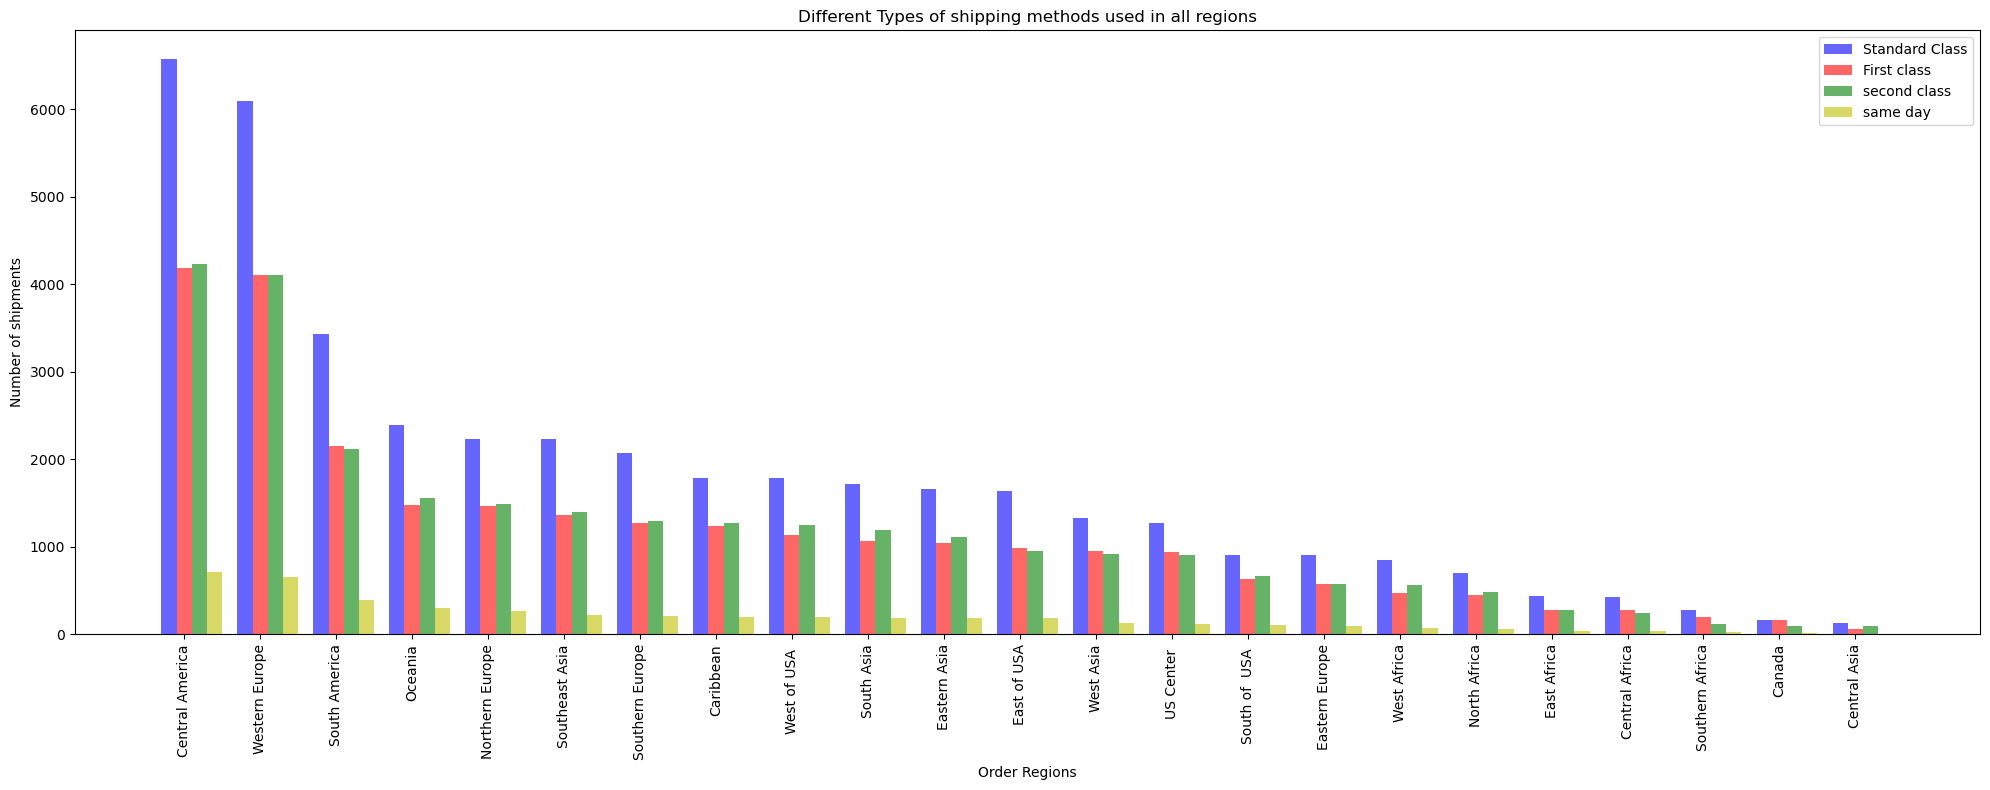

In [17]:
#Filtering late delivery orders with standard class shipping
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
#Filtering late delivery orders with first class shipping
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
#Filtering late delivery orders with second class shipping
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
#Filtering late delivery orders with same day shipping
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]
#Counting total values
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

In [18]:
#Filtering late delivery orders with standard class shipping
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
#Filtering late delivery orders with first class shipping
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
#Filtering late delivery orders with second class shipping
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
#Filtering late delivery orders with same day shipping
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]
#Counting total values
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()

fig = go.Figure()
fig.add_trace(go.Bar(x=names,
                y=count1,
                name='Standard Class',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=names,
                y=count2,
                name='First Class',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x=names,
                y=count3,
                name='Second Class',
                marker_color='rgb(100, 231, 186)'
                ))
fig.add_trace(go.Bar(x=names,
                y=count4,
                name='Same Day',
                marker_color='rgb(243, 134, 59)'
                ))

fig.update_layout(
    title='Different Types of shipping methods used in all regions',
    xaxis={'categoryorder':'total descending'},
    yaxis=dict(
        title='Number of shipments',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()


# Hypothesis 1: Impact of delivery time on order profitability

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Delivery Time Diff', ylabel='Order Profit Per Order'>

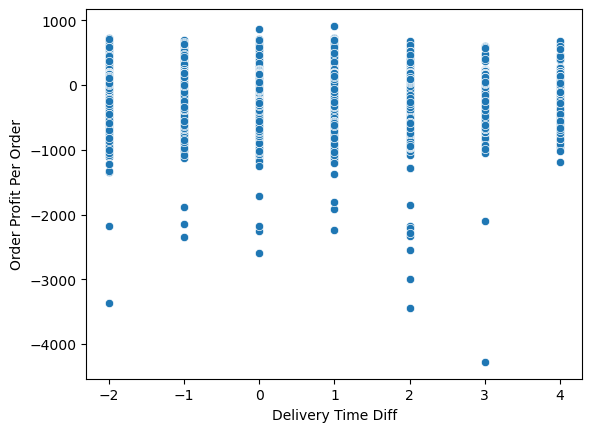

In [19]:
# Filter relevant columns for analysis
df_delivery = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Order Profit Per Order']]

# Calculate the delivery time difference
df_delivery['Delivery Time Diff'] = df_delivery['Days for shipping (real)'] - df_delivery['Days for shipment (scheduled)']

# Plot the relationship between delivery time difference and order profit per order
sns.scatterplot(x='Delivery Time Diff', y='Order Profit Per Order', data=df_delivery)

### Null hypothesis: There is no significant difference in order profitability between orders with shorter actual delivery time and those with longer delivery time.
### Alternative hypothesis: Orders with a shorter actual delivery time are more profitable than those with a longer delivery time.

In [20]:
# calculate the delivery time difference
df["Delivery_Time_Difference"] = df["Days for shipping (real)"] - df["Days for shipment (scheduled)"]

# split the data into two groups based on the delivery time difference
short_delivery = df[df["Delivery_Time_Difference"] < 0]
long_delivery = df[df["Delivery_Time_Difference"] >= 0]

# Conducting a two-sample t-test to compare the mean order profit per order between the two groups
t_stat, p_value = stats.ttest_ind(short_delivery["Order Profit Per Order"], long_delivery["Order Profit Per Order"], equal_var=False)

alpha = 0.05

print("Hypothesis 1: Impact of delivery time on order profitability")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 1: Impact of delivery time on order profitability
t-statistic: 1.139603123470619
p-value: 0.25445538762854697
Fail to reject the null hypothesis


****The output indicates that the calculated t-statistic is 1.14 and the corresponding p-value is 0.25.****

****Since the p-value is greater than the significance level of 0.05, the null hypothesis (there is no significant difference in order profitability between orders with shorter actual delivery time and those with longer delivery time) cannot be rejected.****

****Therefore, based on the results of the test, we cannot conclude that there is a significant impact of delivery time on order profitability.****

# Hypothesis 2: Relationship between sales per customer and delivery status


<AxesSubplot:xlabel='Delivery Status', ylabel='Sales per customer'>

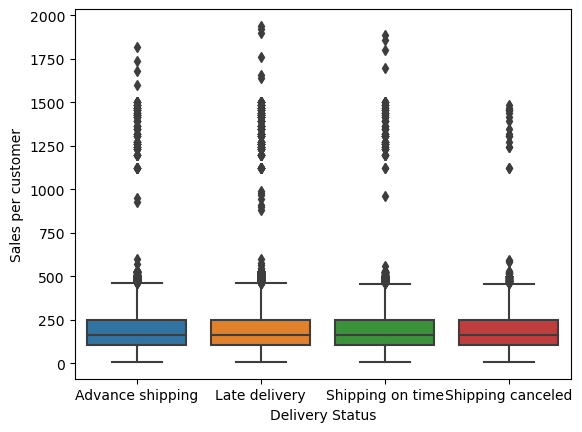

In [21]:
# Filter relevant columns for analysis
df_delivery = df[['Delivery Status', 'Sales per customer']]

# Plot the relationship between delivery status and sales per customer
sns.boxplot(x='Delivery Status', y='Sales per customer', data=df_delivery)

### Null hypothesis: There is no significant difference in sales per customer between orders delivered on time and those that are not.
### Alternative hypothesis: Customers who receive their orders on time have higher sales per customer than those who do not.


In [22]:
# create two groups based on the delivery status
on_time1 = df[df["Delivery Status"] == "Shipping on time"]
on_time2 = df[df["Delivery Status"] == "Advance shipping"]
on_time=pd.concat([on_time1, on_time2], axis=0)
not_on_time = df[df["Delivery Status"] == "Late delivery"]

# Conducting a two-sample t-test to compare the mean sales per customer between the two groups
t_stat, p_value = stats.ttest_ind(on_time["Sales per customer"], not_on_time["Sales per customer"], equal_var=False)

print("Hypothesis 2: Relationship between sales per customer and delivery status")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 2: Relationship between sales per customer and delivery status
t-statistic: 1.8823388357093322
p-value: 0.059791874349571256
Fail to reject the null hypothesis


##### Based on the output, the t-statistic is 1.88 and the p-value is 0.0598, which is higher than the significance level of 0.05. 
##### Therefore, we fail to reject the null hypothesis that there is no significant difference in sales per customer between orders delivered on time and those that are not. 
##### This means that there is insufficient evidence to conclude that customers who receive their orders on time have higher sales per customer than those who do not. However, since the p-value is relatively close to the significance level, further investigation may be warranted to determine if there is a potential relationship between delivery status and sales per customer.

# Hypothesis 3: Impact of late delivery risk on order profit


<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Profit Per Order'>

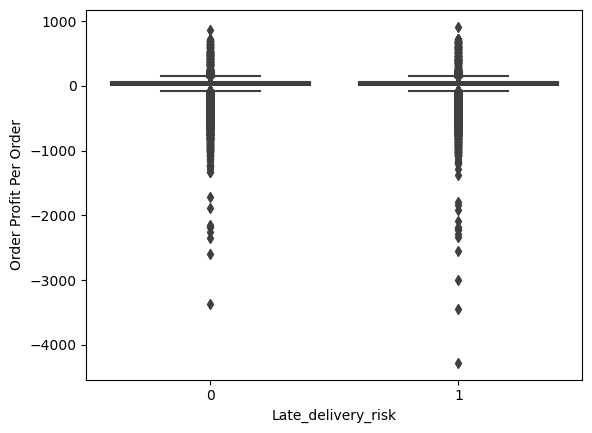

In [23]:
# Filter relevant columns for analysis
df_delivery = df[['Late_delivery_risk', 'Order Profit Per Order']]

# Plot the relationship between late delivery risk and order profit per order
sns.boxplot(x='Late_delivery_risk', y='Order Profit Per Order', data=df_delivery)

### Null hypothesis: There is no significant difference in order profitability between orders with high and low late delivery risk.
### Alternative hypothesis: Orders with a higher late delivery risk are less profitable than those with a lower late delivery risk.


In [24]:
# create two groups based on the late delivery risk
high_risk = df[df["Late_delivery_risk"] == 1]
low_risk = df[df["Late_delivery_risk"] == 0]

# Conducting a two-sample t-test to compare the mean order profit per order between the two groups
t_stat, p_value = stats.ttest_ind(high_risk["Order Profit Per Order"], low_risk["Order Profit Per Order"], equal_var=False)

print("Hypothesis 3: Impact of late delivery risk on order profit")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Hypothesis 3: Impact of late delivery risk on order profit
t-statistic: -1.5868926397312249
p-value: 0.1125387655316413
Fail to reject the null hypothesis


##### Based on the given output, the calculated t-statistic is -1.59 and the p-value is 0.11. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in order profitability between orders with high and low late delivery risk.

# Hypothesis 4: Relationship between product price and sales:

Pearson correlation coefficient: 0.7899
P-value: 0.0000


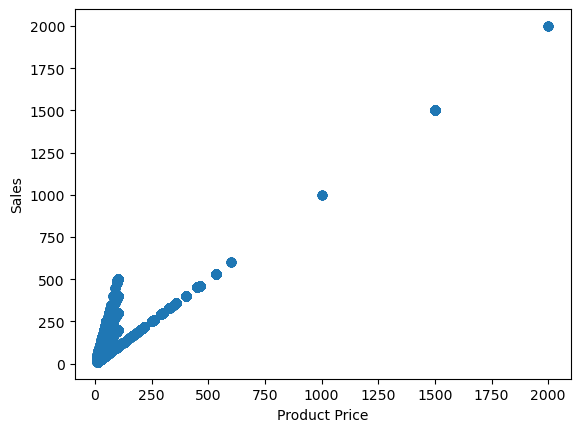

In [25]:
# Filter the relevant columns
df1 = df[['Product Price', 'Sales']]

# Calculate the Pearson correlation coefficient
corr, p_value = stats.pearsonr(df1['Product Price'], df1['Sales'])
print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot the data
plt.scatter(df1['Product Price'], df1['Sales'])
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()

#### We got a Pearson correlation coefficient of 0.7899 and conclude that there is a significant strong positive relationship between product price and sales. The scatter plot will also show us a clear positive trend between product price and sales.

### Null Hypothesis (H0): There is no significant relationship between product price and sales.
### Alternative Hypothesis (H1): There is a significant relationship between product price and sales.

In [26]:
# Calculate the correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(df1['Product Price'], df1['Sales'])

alpha = 0.05

print("Hypothesis: Relationship between product price and sales")
print("Correlation coefficient:", corr_coef)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis: Relationship between product price and sales
Correlation coefficient: 0.7899482013113878
p-value: 0.0
Reject the null hypothesis


#####  The p-value of 0.0 indicates that there is a very low probability of observing such a strong correlation by chance, which leads to the rejection of the null hypothesis. Therefore, we can conclude that there is a significant relationship between product price and sales.

# Hypothesis 5: Impact of shipping mode on order profitability

<AxesSubplot:xlabel='Shipping Mode', ylabel='Order Profit Per Order'>

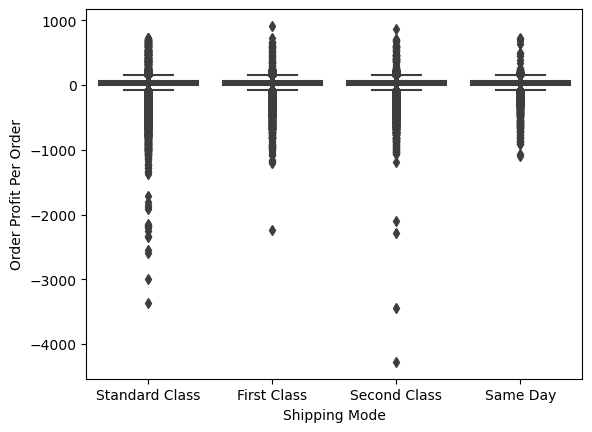

In [27]:
# Filter relevant columns for analysis
df_delivery = df[['Shipping Mode', 'Order Profit Per Order']]

# Plot the relationship between shipping mode and order profit per order
sns.boxplot(x='Shipping Mode', y='Order Profit Per Order', data=df_delivery)

#### Null hypothesis: There is no significant difference in order profitability between different shipping modes.
#### Alternative hypothesis: Certain shipping modes are more profitable than others.

In [28]:
#Filter the relevant columns
#df = df[['Shipping Mode', 'Order Profit Per Order']]

#Group the data by shipping mode
shipping_groups = df_delivery.groupby('Shipping Mode')

#Conducting a one-way ANOVA test to compare the mean order profit per order between the shipping mode groups
f_stat, p_value = stats.f_oneway(*[group['Order Profit Per Order'] for name, group in shipping_groups])

alpha = 0.05

print("Hypothesis 5: Impact of shipping mode on order profitability")
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 5: Impact of shipping mode on order profitability
F-statistic: 1.9791817108864236
p-value: 0.11469269801389084
Fail to reject the null hypothesis


##### Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in order profitability between different shipping modes.

# Hypothesis 6: Relationship between product category and order profitability

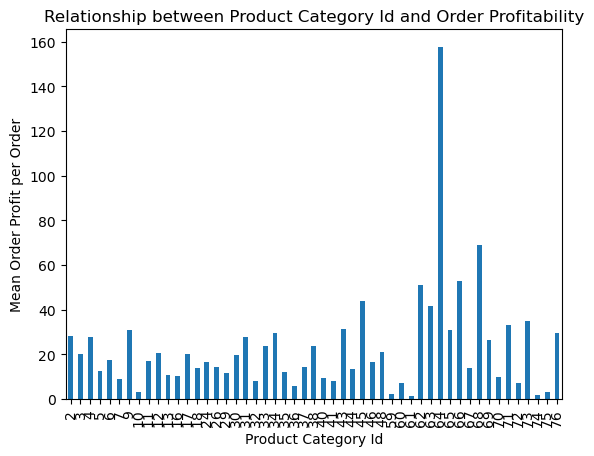

In [29]:
#Filter the relevant columns
df2 = df[['Product Category Id', 'Order Profit Per Order']]


# calculate the mean order profit per order for each product category
mean_profit = df.groupby("Product Category Id")["Order Profit Per Order"].mean()

# create a bar chart to visualize the mean order profit per order for each product category
mean_profit.plot(kind="bar")
plt.title("Relationship between Product Category Id and Order Profitability")
plt.xlabel("Product Category Id")
plt.ylabel("Mean Order Profit per Order")
plt.show()

### Null hypothesis: There is no significant difference in order profitability between different product categories.
### Alternative hypothesis: Certain product categories are more profitable than others.

In [30]:
#Group the data by product category
product_groups = df2.groupby("Product Category Id")

#Conducting a one-way ANOVA test to compare the mean order profit per order between the product groups
f_stat, p_value = stats.f_oneway(*[group['Order Profit Per Order'] for name, group in product_groups])

alpha = 0.05

print("Hypothesis 6: Relationship between product category and order profitability")
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 6: Relationship between product category and order profitability
F-statistic: 50.753045450066324
p-value: 0.0
Reject the null hypothesis


##### Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that there is a significant difference in order profitability between different product categories. The alternative hypothesis that certain product categories are more profitable than others is supported by the data.

# ***Classification Algorithms***

## 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [32]:
# Select the columns needed for the model
prediction_data=data[['Order Region','Shipping Mode','Delivery Status']]
prediction_data.columns=['Order_Region','Shipping_Mode','Delivery_Status'] #by including the Type column the model lowers its precision, by including Customer City the model does not converge
prediction_data=prediction_data[prediction_data.Delivery_Status!='Shipping canceled']
prediction_data=prediction_data[prediction_data.Delivery_Status!='Advance shipping']
prediction_data.head()

,Order_Region,Shipping_Mode,Delivery_Status
1,South Asia,Standard Class,Late delivery
2,South Asia,Standard Class,Shipping on time
6,Eastern Asia,First Class,Late delivery
7,Eastern Asia,First Class,Late delivery
8,Eastern Asia,Second Class,Late delivery


In [33]:
#Feature enginering, one hot encoding
#Using one hot encoding when the categorical variable is NOMINAL
prediction_data=pd.get_dummies(prediction_data, drop_first=True)
prediction_data.head()

,Order_Region_Caribbean,Order_Region_Central Africa,Order_Region_Central America,Order_Region_Central Asia,Order_Region_East Africa,Order_Region_East of USA,Order_Region_Eastern Asia,Order_Region_Eastern Europe,Order_Region_North Africa,Order_Region_Northern Europe,...,Order_Region_Southern Europe,Order_Region_US Center,Order_Region_West Africa,Order_Region_West Asia,Order_Region_West of USA,Order_Region_Western Europe,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Delivery_Status_Shipping on time
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
#Test train split
X_train, X_test, Y_train, Y_test=train_test_split(prediction_data.drop('Delivery_Status_Shipping on time',axis=1),prediction_data['Delivery_Status_Shipping on time'])

In [35]:
#train the model
LogReg=LogisticRegression()
LogReg.fit(X_train, Y_train)

LogisticRegression()

In [36]:
#score the model
LogReg.score(X_test, Y_test)

0.7604439836555468

In [37]:
Y_pred=LogReg.predict(X_test)
print (classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     24792
           1       0.53      0.15      0.24      8002

    accuracy                           0.76     32794
   macro avg       0.65      0.56      0.55     32794
weighted avg       0.72      0.76      0.71     32794



### The model created using logistic regression has an accuracy of 76%.

## 2. Random forest

In [38]:
#Import dependencies and train the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [39]:
#score the model
classifier.score(X_test,Y_test)

0.760992864548393

In [40]:
Y_pred_RF=classifier.predict(X_test)
print (classification_report(Y_test,Y_pred_RF))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86     24792
           1       0.55      0.11      0.18      8002

    accuracy                           0.76     32794
   macro avg       0.66      0.54      0.52     32794
weighted avg       0.72      0.76      0.69     32794



### The model created using the Random Forest algorithm has an accuracy of  75.76%.